# Capítulo 08 - Métodos baseados em árvore

Métodos baseados em árvores são chamados assim, pois as regras de divisão usadas para segmentar o espaço preditor podem ser representadas na forma de uma árvore de ponta cabeça. Sua aplicação pode ser em tanto para problemas de regressão quanto para problemas de classificação.

## O básico sobre árvores de decisão

O algoritmo da árvore de decisão é caracterizado por ser *top-bottom* e *greedy (guloso)*

### Árvores de regressão

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Parâmetros estéticos dos gráficos:
set_palette = "Paired"
axes_style = "ticks"

df_hitters = pd.read_csv("../data/Hitters.csv")

df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


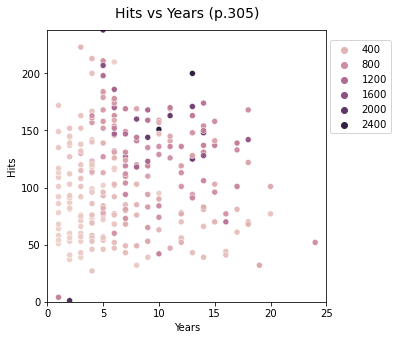

In [2]:
y = df_hitters["Hits"]
x = df_hitters["Years"]
z = df_hitters["Salary"]

sns.set_palette(set_palette)
sns.axes_style(axes_style)

plt.figure(figsize=(5,5))
ax = sns.scatterplot(x=x, y=y, hue=z)
ax.set_title('Hits vs Years (p.305)', fontdict={'fontsize':14}, pad=12)
ax.set(xlim=(0, 25), ylim=(0, 238))

plt.legend(bbox_to_anchor=(1.25, 0.98),borderaxespad=0.5)

#### Construindo uma árvore de regressão (p. 309):

Aqui simplesmente traduzirei o algoritmo descrito na página 309.

1. Use divisão recursiva binária para desenvolver uma árvore profunda sobre os dados de treinamento, pare somente quando cad nó terminal (folha) tiver menos que o mínimo de observações desejado.


2. Aplique a poda de complexidade de custo a árvore profunda com o objetivo de obter uma sequência de sub-árvores melhores como uma função de *alfa*.


3. Use *K-fold cross validation* para escolher *alfa*. Isto é, divida as observações do treinamento em *K* partes. Para cada k = 1, ..., K:
 - a) Repita os passos 1 e 2 em todas as *K* partes com exceção da k-ésima parte dos dados de treinamento.
 - b) Avalie o erro quadrático médio da previsão na parte deixada de fora (k-ésima parte dos dados de treinamento) como uma função de *alfa*.
 - Calcule a média dos resultados para cada valor de *alfa* e escolha o *alfa* que minimize o erro médio.


4. Retorne a sub-árvore da etapa 2 que corresponde ao valor escolhido de *alfa*.

## Bônus: Boosting

Antes vamos lembrar a importância dos resíduos. Segundo o prof. Eduardo Vargas Ferreira (LEG-UFPR), "nos resíduos está 'tudo' que o modelo não conseguiu captar". Numa regressão temos:
<tr>
    <td>
        <img src="../figures/8_boosting_residuos.png" alt="Relação entre a regressão e os resíduos." width="350"/>
        <p style="text-align:center">Figura 01 - Relação entre a regressão e os resíduos.</p>
        <p style="text-align:center">Fonte: <a href="http://cursos.leg.ufpr.br/ML4all/1parte/">Aulas do Prof. Eduardo Vargas Ferreira (LEG-UFPR)</a>.</p>
    </td>
</tr>

A Figura 01 mostra a relação entre o erro total (**SQT**), o valor estimado pela regressão (**SQR**) e o resíduo (**SQE**). Ou seja, toda variabilidade **NÃO explicada** pela regressão ficará no resíduo.

### 1. O que é?
Modelos de aprendizado em conjunto (ensemble) do tipo boosting são construídos colocando estimadores em sequência, onde um estimador tenta reduzir o viés do conjunto anterior a ele. Ainda segundo a [documentação do do Sci-kit learn](https://scikit-learn.org/stable/modules/ensemble.html#ensemble), a motivação é combinar modelos fracos para produzir um conjunto (ensemble) poderoso.

Boosting é classificado como um tipo de aprendizado em conjunto ou *Ensemble*. Existem três tipos de *Ensemble* que são o Bagging, o Boosting e, por fim, o Stacking.

<tr>
    <td>
        <img src="../figures/8_ensembles_types.jpeg" alt="Tabela indicando os três tipos de modelos de aprendizado em conjunto (Ensemble)." width="600"/>
        <p style="text-align:center">Figura 02 - Tabela indicando os três tipos de modelos de aprendizado em conjunto (Ensemble).</p>
        <p style="text-align:center">Fonte: Apresentação H2O.</p>
    </td>
</tr>


## Exemplos de métodos de boosting
### 1. AdaBoost / Adaptive Boosting (1995)
- proposto por Freund, Y. e Schapire, R.

### 2. Gradient Tree Boosting / Gradient Boosting Machine (GBM) (Fevereiro de 1999)
- proposto por Friedman, J. H.

### 3. XGBoost (Março de 2014)
- proposto por Tianqi Chen.

### 4. Light GBM (Janeiro de 2017)
- proposto por Microsoft.

### 5. CatBoost (Abril de 2017)
- proposto por Yandex (comentário de Suto: "Yandex é o Google Russo").

<tr>
    <td>
        <img src="../figures/8_boosting_cat_XGB_LightGBM.PNG" alt="CatBoost vs. Light GBM vs. XGBoost. Cronologia." width="580"/>
        <p style="text-align:center">Figura 01 - CatBoost vs. Light GBM vs. XGBoost. Cronologia.</p>
        <p style="text-align:center">Fonte: <a href="https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db">2018 - Swalin, A.; "CatBoost vs. Light GBM vs. XGBoost; texto no Medium"</a>.</p>
    </td>
</tr>